e22cseu0750

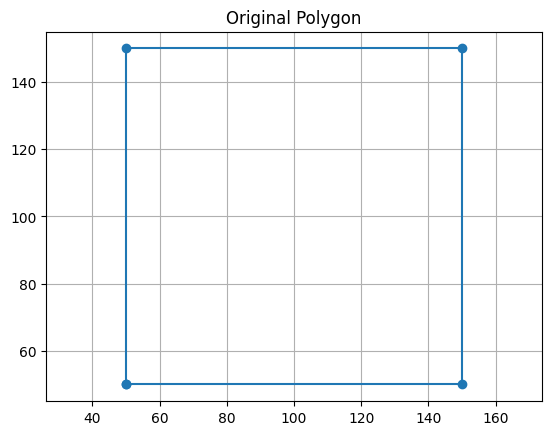

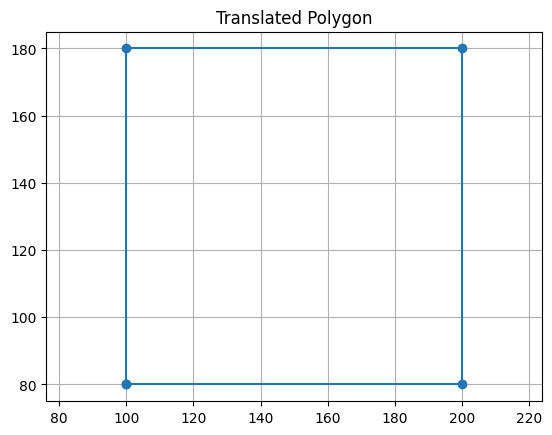

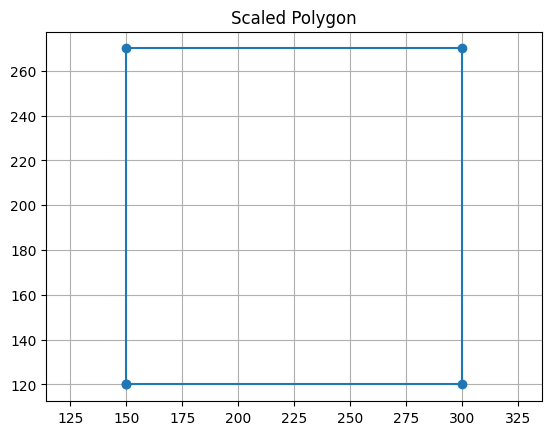

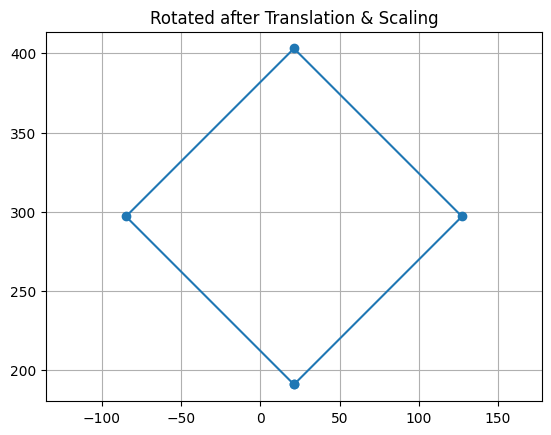

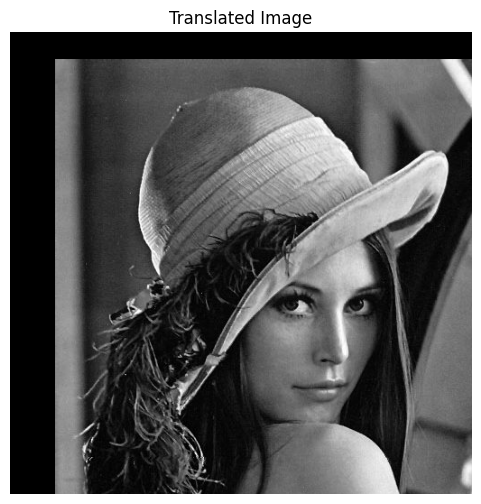

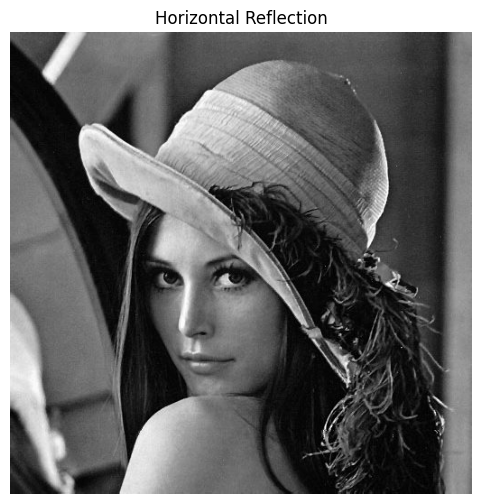

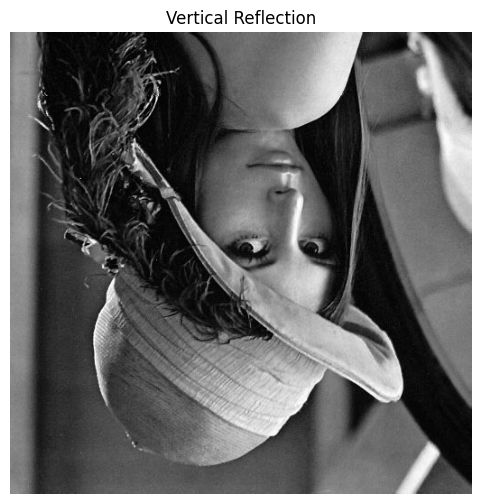

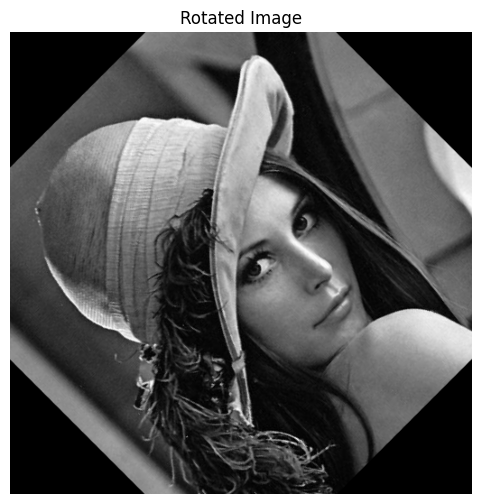

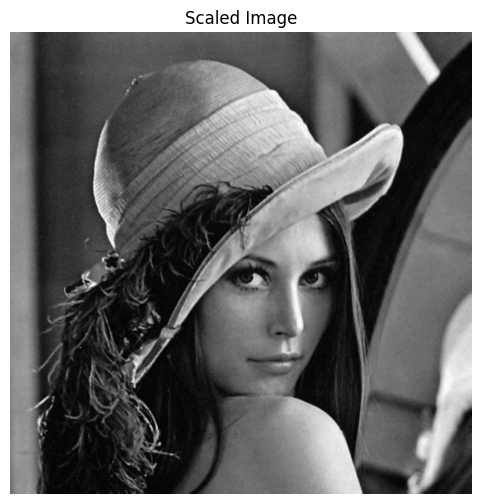

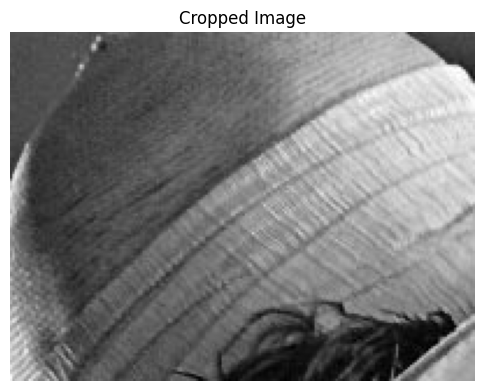

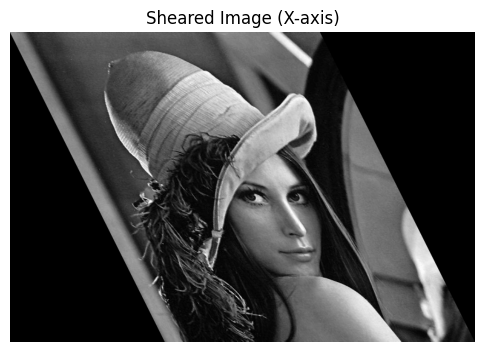

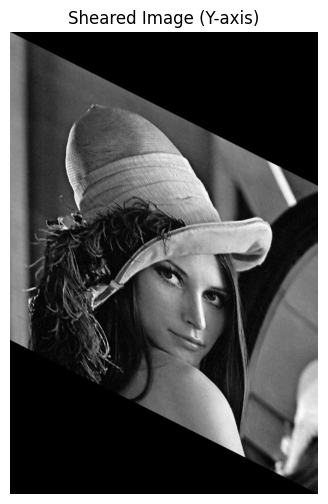

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display images
def display_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# TASK 1: Computer Graphics – 2D Scaling Transformation using Matplotlib
# Define a polygon (rectangle) with coordinates
polygon = np.array([[50, 50], [150, 50], [150, 150], [50, 150]])

# Plot the original polygon
def plot_polygon(points, title="Polygon"):
    points = np.vstack([points, points[0]])  # Close the polygon
    plt.plot(points[:, 0], points[:, 1], marker='o')
    plt.title(title)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Transformation functions
def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (translation_matrix @ homogeneous_points.T).T[:, :2]

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (scaling_matrix @ homogeneous_points.T).T[:, :2]

def rotate(points, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians), 0],
                               [np.sin(angle_radians), np.cos(angle_radians), 0],
                               [0, 0, 1]])
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (rotation_matrix @ homogeneous_points.T).T[:, :2]

def reflect(points, axis='x'):
    reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]]) if axis == 'x' else np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (reflection_matrix @ homogeneous_points.T).T[:, :2]

def shear(points, shx=0, shy=0):
    shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (shearing_matrix @ homogeneous_points.T).T[:, :2]

# Composite transformation example: Translate -> Scale -> Rotate
translated = translate(polygon, 50, 30)
scaled = scale(translated, 1.5, 1.5)
rotated = rotate(scaled, 45)

# Plot transformations
plot_polygon(polygon, "Original Polygon")
plot_polygon(translated, "Translated Polygon")
plot_polygon(scaled, "Scaled Polygon")
plot_polygon(rotated, "Rotated after Translation & Scaling")

# TASK 2: Image Transformations using OpenCV
image = cv2.imread('Picture2.jpg')
(h, w) = image.shape[:2]

# 1. Image Translation
M_translate = np.float32([[1, 0, 50], [0, 1, 30]])
translated_image = cv2.warpAffine(image, M_translate, (w, h))
display_image("Translated Image", translated_image)

# 2. Image Reflection (Horizontal and Vertical)
reflected_horizontal = cv2.flip(image, 1)
reflected_vertical = cv2.flip(image, 0)
display_image("Horizontal Reflection", reflected_horizontal)
display_image("Vertical Reflection", reflected_vertical)

# 3. Image Rotation (Rotate 45 degrees around the center)
center = (w // 2, h // 2)
M_rotate = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, M_rotate, (w, h))
display_image("Rotated Image", rotated_image)

# 4. Image Scaling
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
display_image("Scaled Image", scaled_image)

# 5. Image Cropping
cropped_image = image[50:200, 100:300]
display_image("Cropped Image", cropped_image)

# 6. Shearing in x-axis
M_shear_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_x = cv2.warpAffine(image, M_shear_x, (int(w * 1.5), h))
display_image("Sheared Image (X-axis)", sheared_x)

# 7. Shearing in y-axis
M_shear_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_y = cv2.warpAffine(image, M_shear_y, (w, int(h * 1.5)))
display_image("Sheared Image (Y-axis)", sheared_y)
